# We would like to know what makes people interested into each other.

## Data Exploration Ideas :

What are the least desirable sincibutes in a male partner? Does this differ for female partners?

How important do people think attractiveness is in potential mate selection vs. its real impact?

Are shared interests more important than a shared racial background?

Can people accurately predict their own perceived value in the dating market?

In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

How impactfull is the job in date success ? 

## Import libraries and dataset

In [113]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [114]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding='unicode_escape')

## Descriptive statistics


In [115]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


/tmp/ipykernel_18434/1833228869.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins=20)


<Axes: xlabel='age', ylabel='Density'>

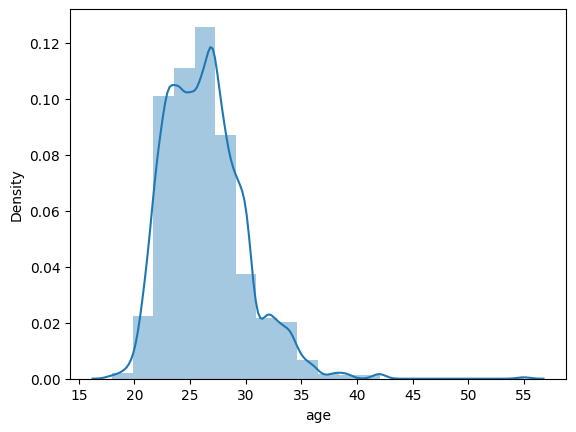

In [116]:
sns.distplot(df['age'],bins=20)

<Axes: xlabel='goal', ylabel='count'>

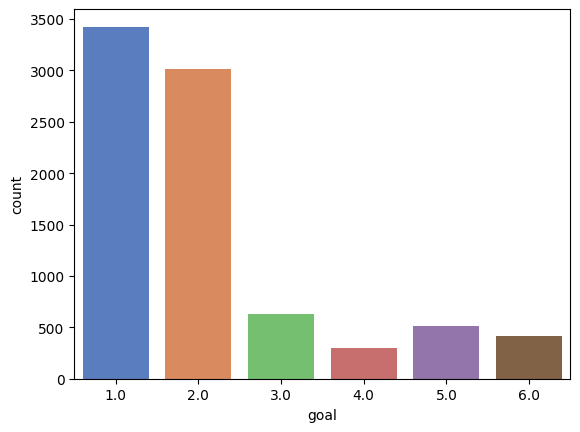

In [155]:
sns.countplot(x='goal',palette='muted', data=df)

## Most desirable attributes
I selected only answers at signup (Time1) and the followups (Time 2 and Time 3 : the day after the experiment and 3-4 weeks later) because some variables are missing in the halfwaythrough questionnaire.

First I define masks to segregate men and women from the initial dataset.

Then I select the variable I am interested in (attribute scores ending with 1\_1, 1\_2, etc..). These variables correspond to: 

- The importance score of male attributes for women

- The importance score of male attributes for women from antoher woman's perspective

- The importance score of male attributes for women from men's perspective

I create my datasets separately because I will need to reorganize them separately before merging them.

Finally I just rename each dataframe's columns for better ease of merge later on.

## Men's case

In [118]:
# Masks
woman_only = df['gender'] == 0
men_only = df['gender'] == 1


list_of_variables = ['1_1', '1_2', '1_3', '2_1', '2_2', '2_3', '4_1', '4_2', '4_3']

list_of_lists = []
for i in list_of_variables:
    one_list = [col for col in df.columns if i in col]
    list_of_lists.append(one_list)


w_expect1 = df[woman_only][list_of_lists[0]]                 # What women like about men
w_expect_2 = df[woman_only][list_of_lists[1]]
w_expect_3 = df[woman_only][list_of_lists[2]]

m_thoughts_1 = df[men_only][list_of_lists[3]]               # What men think women like about men
m_thoughts_2 = df[men_only][list_of_lists[4]]
m_thoughts_3 = df[men_only][list_of_lists[5]]

other_w_expect_1 = df[woman_only][list_of_lists[6]]           # What women think other women like about men
other_w_expect_2 = df[woman_only][list_of_lists[7]]
other_w_expect_3 = df[woman_only][list_of_lists[8]]

df_dict_m = {'w_expect_1' : w_expect1, 
          'w_expect_2' : w_expect_2, 
          'w_expect_3' : w_expect_3, 
          'm_thoughts_1' : m_thoughts_1, 
          'm_thoughts_2' : m_thoughts_2, 
          'm_thoughts_3' : m_thoughts_3, 
          'other_w_expect_1' : other_w_expect_1, 
          'other_w_expect_2' : other_w_expect_2, 
          'other_w_expect_3' : other_w_expect_3}


for value in df_dict_m.values():
    value.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

mean_dict_m = {}
for key, value in df_dict_m.items():
    mean_dict_m[key] = value.mean()

mean_df_m = pd.DataFrame(mean_dict_m).rename_axis('attributes').reset_index()

mean_melted_m = pd.melt(mean_df_m, id_vars='attributes', var_name="source", value_name="score")


## Women's case


In [119]:
m_expect_1 = df[men_only][list_of_lists[0]]                 # What men like about women
m_expect_2 = df[men_only][list_of_lists[1]]
m_expect_3 = df[men_only][list_of_lists[2]]

w_thoughts_1 = df[woman_only][list_of_lists[3]]               # What women think men like about women
w_thoughts_2 = df[woman_only][list_of_lists[4]]
w_thoughts_3 = df[woman_only][list_of_lists[5]]

other_m_expect_1 = df[men_only][list_of_lists[6]]           # What men think other men like about women
other_m_expect_2 = df[men_only][list_of_lists[7]]
other_m_expect_3 = df[men_only][list_of_lists[8]]

df_dict_w = {'m_expect_1' : m_expect_1,
             'm_expect_2' : m_expect_2,
             'm_expect_3' : m_expect_3,
             'w_thoughts_1' : w_thoughts_1,
             'w_thoughts_2' : w_thoughts_2,
             'w_thoughts_3'  : w_thoughts_3 ,
             'other_m_expect_1' : other_m_expect_1,
             'other_m_expect_2' : other_m_expect_2,
             'other_m_expect_3' : other_m_expect_3}


for value in df_dict_w.values():
    value.columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

mean_dict_w = {}
for key, value in df_dict_w.items():
    mean_dict_w[key] = value.mean()

mean_df_w = pd.DataFrame(mean_dict_w).rename_axis('attributes').reset_index()

mean_melted_w = pd.melt(mean_df_w, id_vars='attributes', var_name="source", value_name="score")


(0.0, 32.0)

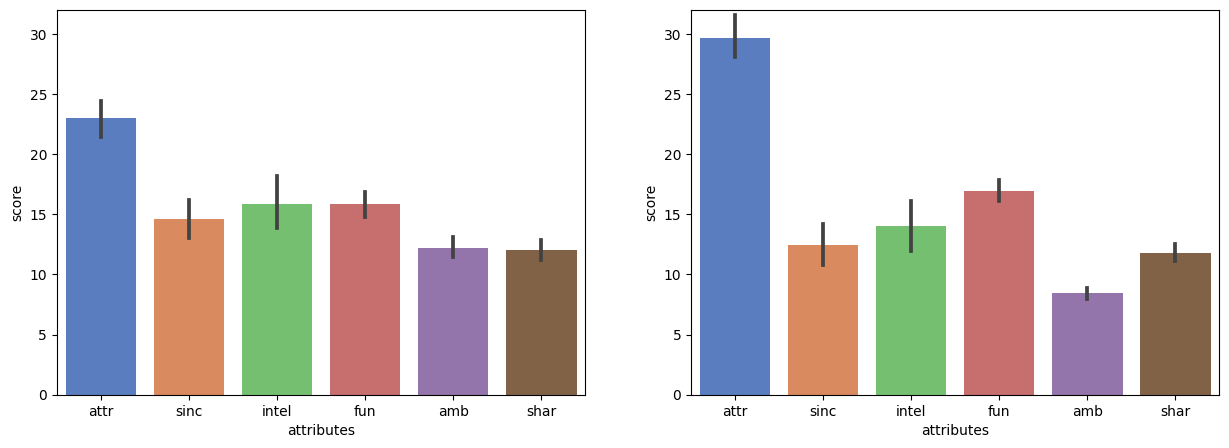

In [154]:
fig , axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(ax= axes[0],x='attributes', y="score", palette='muted', data = mean_melted_m).set_ylim([0,32])
sns.barplot(ax= axes[1],x='attributes', y="score", palette='muted', data = mean_melted_w).set_ylim([0,32])

In [121]:
### correlation of nanana variable

## Are shared interests more important than a shared racial background?

<Axes: xlabel='match', ylabel='int_corr'>

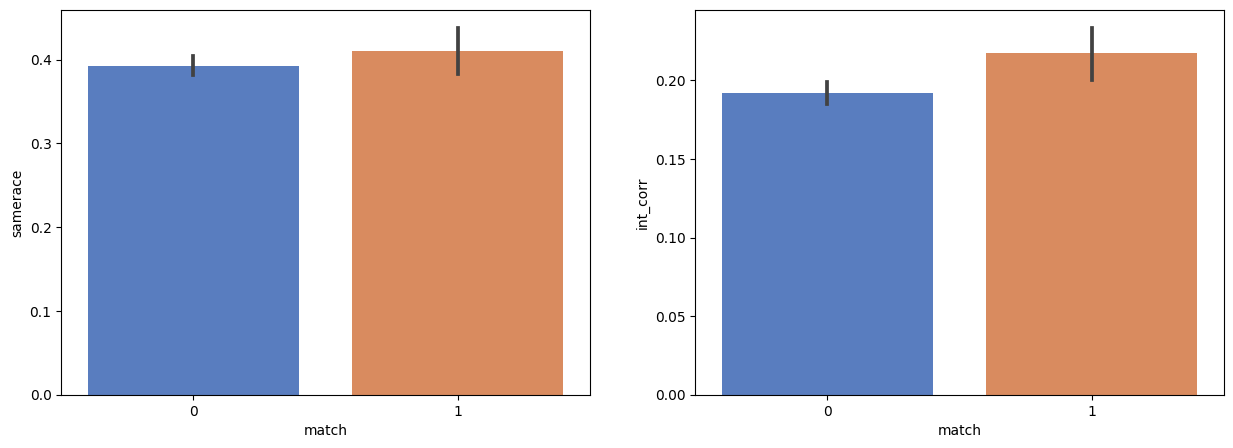

In [153]:
fig , axes = plt.subplots(1,2,figsize=(15,5))

sns.barplot(ax= axes[0],x='match', y="samerace", palette='muted', data = df)
sns.barplot(ax= axes[1],x='match', y="int_corr", palette='muted', data = df)

## Is it better to be someone's first speed date of the night or their last?

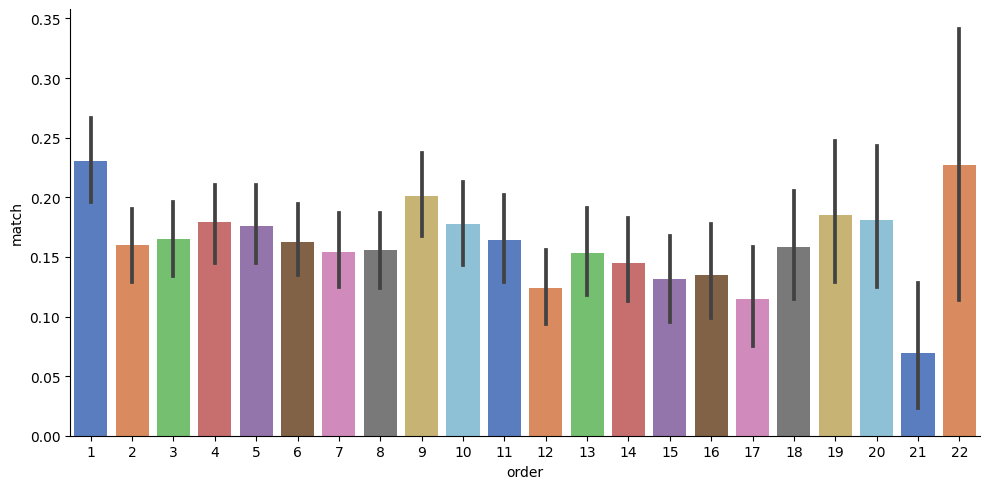

In [152]:
sns.catplot(x='order', y="match", palette='muted', kind='bar', data = df,aspect=2)

## Can people accurately predict their own perceived value in the dating market?

/tmp/ipykernel_18434/3260230066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_eval['pid'].replace('', np.nan, inplace=True)
/tmp/ipykernel_18434/3260230066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_eval.dropna(subset=['pid'], inplace=True)
/tmp/ipykernel_18434/3260230066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partner_eval['pid'].replace('', np.nan, inplace=True)
/tmp/ipykernel_18434/3260230066.py:

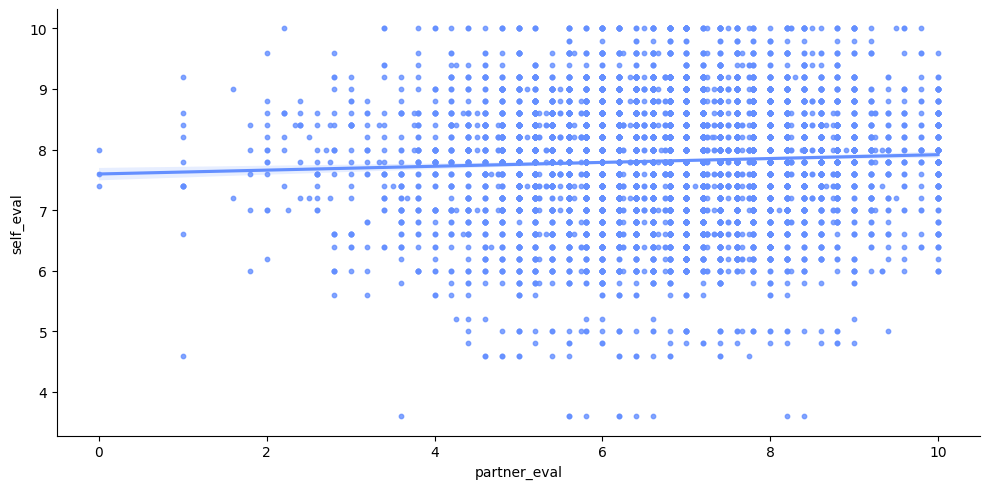

In [151]:
self_eval = df.iloc[:,np.r_[0,11,87:92]]
partner_eval = df.iloc[:,np.r_[11,98:103]]

self_eval['pid'].replace('', np.nan, inplace=True)
self_eval.dropna(subset=['pid'], inplace=True)
self_eval = self_eval.drop('pid',axis=1)

partner_eval['pid'].replace('', np.nan, inplace=True)
partner_eval.dropna(subset=['pid'], inplace=True)
partner_eval['pid'] = partner_eval['pid'].astype(int)

partner_eval = partner_eval.set_index('pid').rename_axis("").sort_index()
self_eval = self_eval.set_index('iid').rename_axis("").sort_index()

evals = pd.DataFrame()
evals['partner_eval'] = partner_eval.mean(axis=1)
evals['self_eval'] = self_eval.mean(axis=1)

sns.lmplot(x='partner_eval',y='self_eval', palette='muted',data = evals, scatter_kws={"s": 10},aspect=2)

/tmp/ipykernel_18434/130617145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender['pid'].replace('', np.nan, inplace=True)
/tmp/ipykernel_18434/130617145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender.dropna(subset=['pid'], inplace=True)


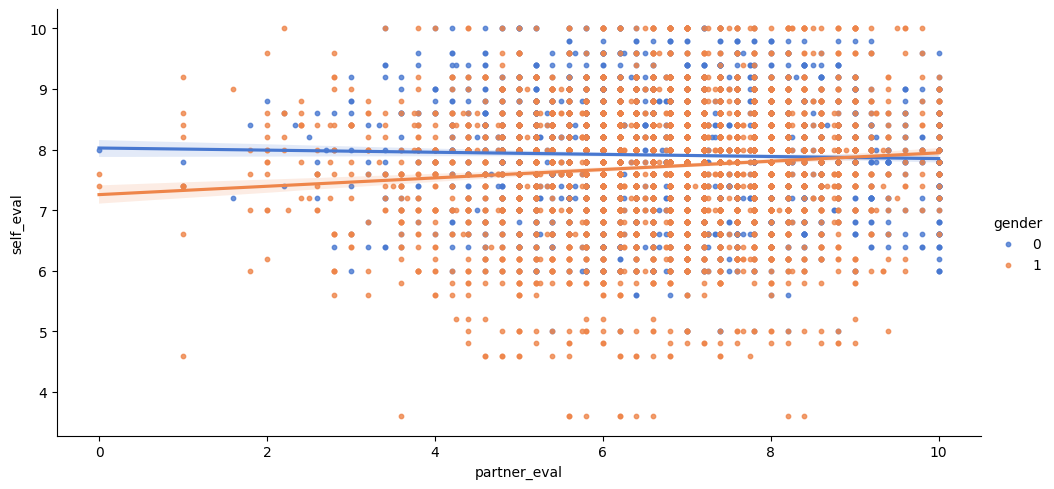

In [150]:
gender = df.iloc[:,np.r_[0,11,2]]
gender['pid'].replace('', np.nan, inplace=True)
gender.dropna(subset=['pid'], inplace=True)
gender = gender.drop('pid',axis=1)
gender = gender.set_index('iid').rename_axis("").sort_index()

evals['gender'] = gender

sns.lmplot(x='partner_eval',y='self_eval',hue='gender',palette='muted',data = evals,scatter_kws={"s": 10},aspect=2)